Link to Kaggle Data Set: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

# 2.The problem

The purpose of this project is to predict the probability that a Hotel booking reservation will be canceled within a month of actual arrival date. In the Hotel business adiqute staffing is not only essential to a good customer experience but keeps the business from loosing money as well. 

# 2.1 Import & Review

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Objectives

Fundumental Q's

* Correlation btwn 'is_canceled' & 'lead_time'?
    * length of res before cancel
    
* Can cancellation be predicted a month in advance?
    * largest length of res before cancel
    
* Correlation btwn seasons and cancelations

In [4]:
#Import data
booking_data = pd.read_csv('hotel_bookings.csv')

In [6]:
booking_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [35]:
booking_data.shape

(119390, 30)

In [7]:
#Summary of the data
booking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
booking_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Plausible columns

## 2.2 Explore & Clean the Data

Lets take a look at any null values in the Hotel Booking data

In [9]:
booking_data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

The `company` column seems to be almost completely null values. The `agent` column also has a significant amount of null values. However, our goal here is to find which element or combination of elements are likely to cause hotel booking cancellations. Therefore, these columns are not relevant and can be dropped.

The columns `childeren` & `country` have insignificant amounts of null values and can be replaced.

In [10]:
booking_data['children'].fillna(0, inplace=True)
booking_data['country'].fillna('Unknown', inplace=True)
booking_data.drop(['agent','company'],axis=1,inplace=True)

In [11]:
booking_data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [14]:
booking_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [45]:
#number of unique Resort & Hotel bookings
hotel_type = booking_data['hotel'].value_counts()
hotel_type

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

The data contains almost double the amount of City Hotel bookings compared to Resort Hotel bookings



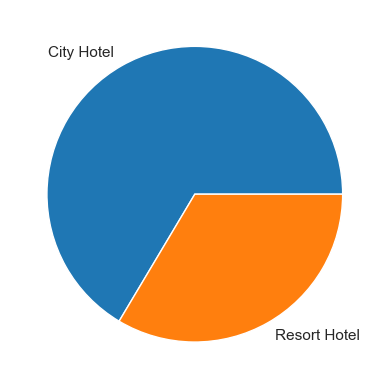

In [47]:
y = hotel_type.tolist()

labels = hotel_type.index.tolist()

plt.pie(y, labels=labels)
plt.show()


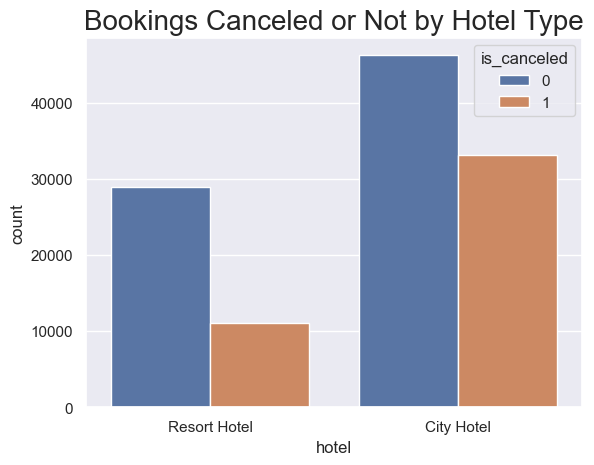

In [16]:
sns.set(style = "darkgrid")
plt.title("Bookings Canceled or Not by Hotel Type", fontdict = {'fontsize': 20})
ax = sns.countplot(x = "hotel", hue = 'is_canceled', data = booking_data)

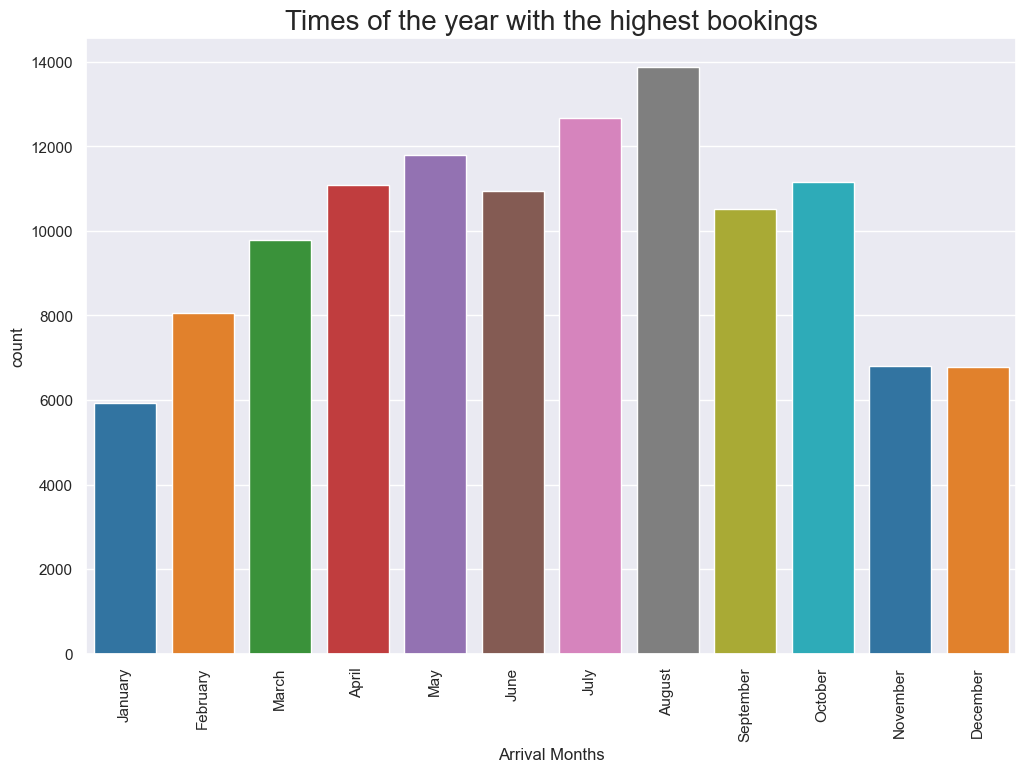

In [17]:
months_sorted = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.figure(figsize=(12,8))
plt.title("Times of the year with the highest bookings", fontdict = {'fontsize': 20})
sns.countplot(x = booking_data['arrival_date_month'], palette='tab10', order = months_sorted)
plt.xlabel('Arrival Months')
plt.xticks(rotation = 90)
plt.show()

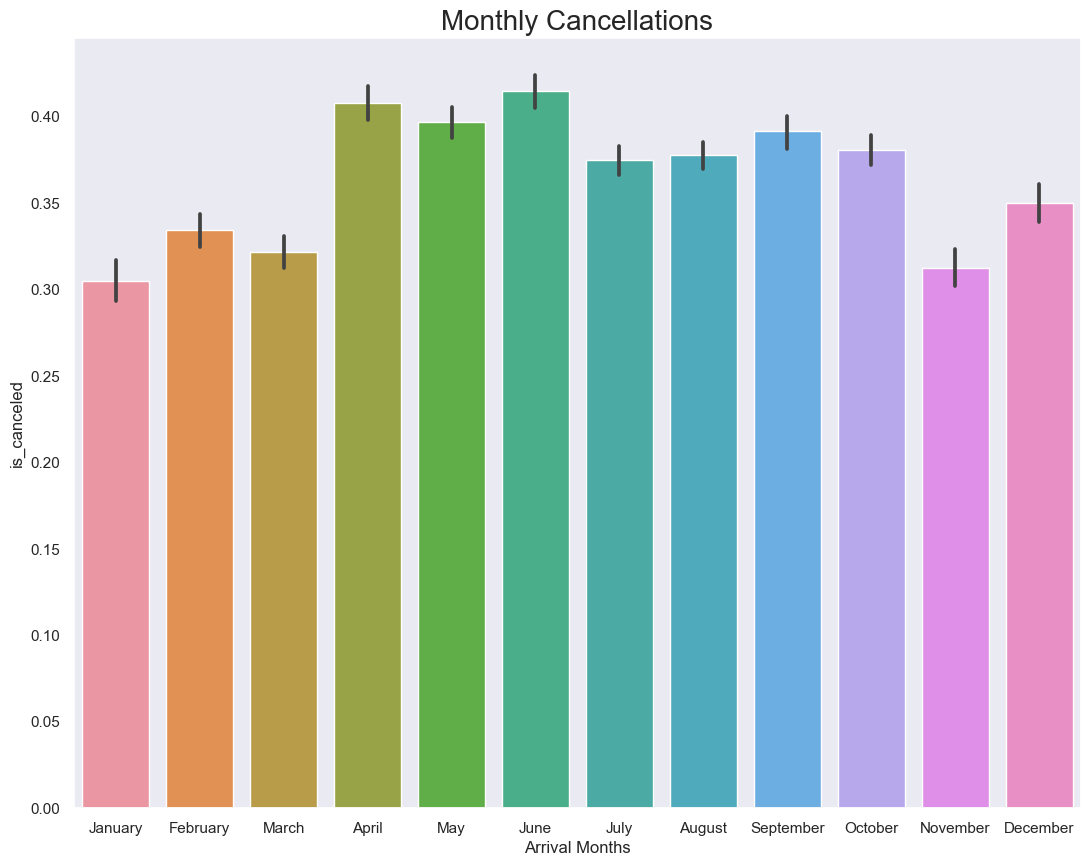

In [18]:
plt.figure(figsize = (13,10))
sns.set(style="dark")
plt.title("Monthly Cancellations", fontdict={'fontsize': 20})
sns.barplot(x = 'arrival_date_month', y = 'is_canceled', data = booking_data, order = months_sorted)
plt.xlabel('Arrival Months')
plt.show()

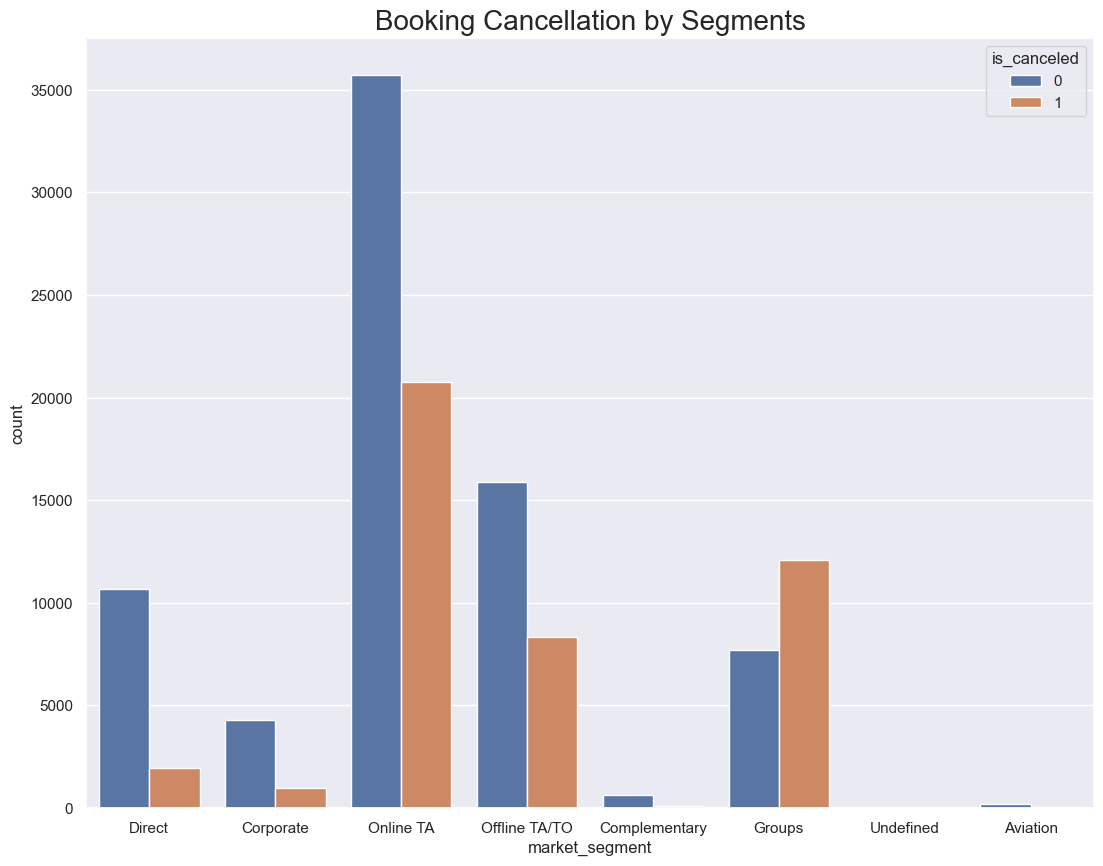

In [19]:
plt.figure(figsize = (13,10))
sns.set(style = "darkgrid")
plt.title("Booking Cancellation by Segments", fontdict = {'fontsize':20})
ax = sns.countplot(x = "market_segment", hue = 'is_canceled', data = booking_data)

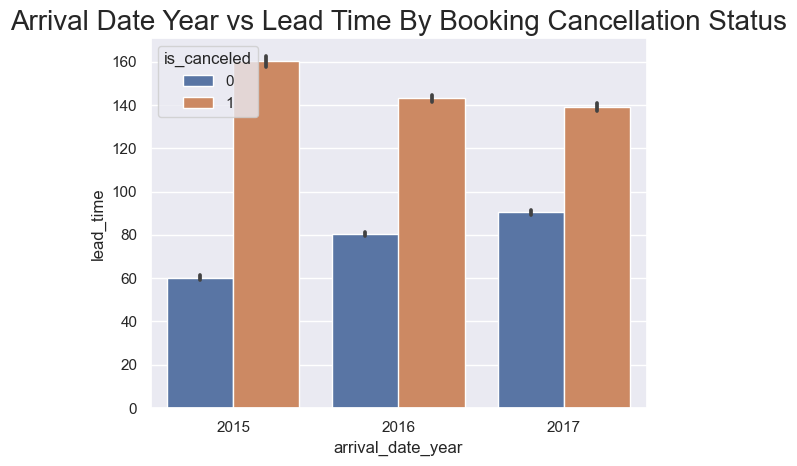

In [20]:
sns.set(style = "darkgrid")
plt.title("Arrival Date Year vs Lead Time By Booking Cancellation Status", fontdict = {'fontsize': 20})
ax = sns.barplot(x = "arrival_date_year", y = "lead_time" ,hue = 'is_canceled', data = booking_data)

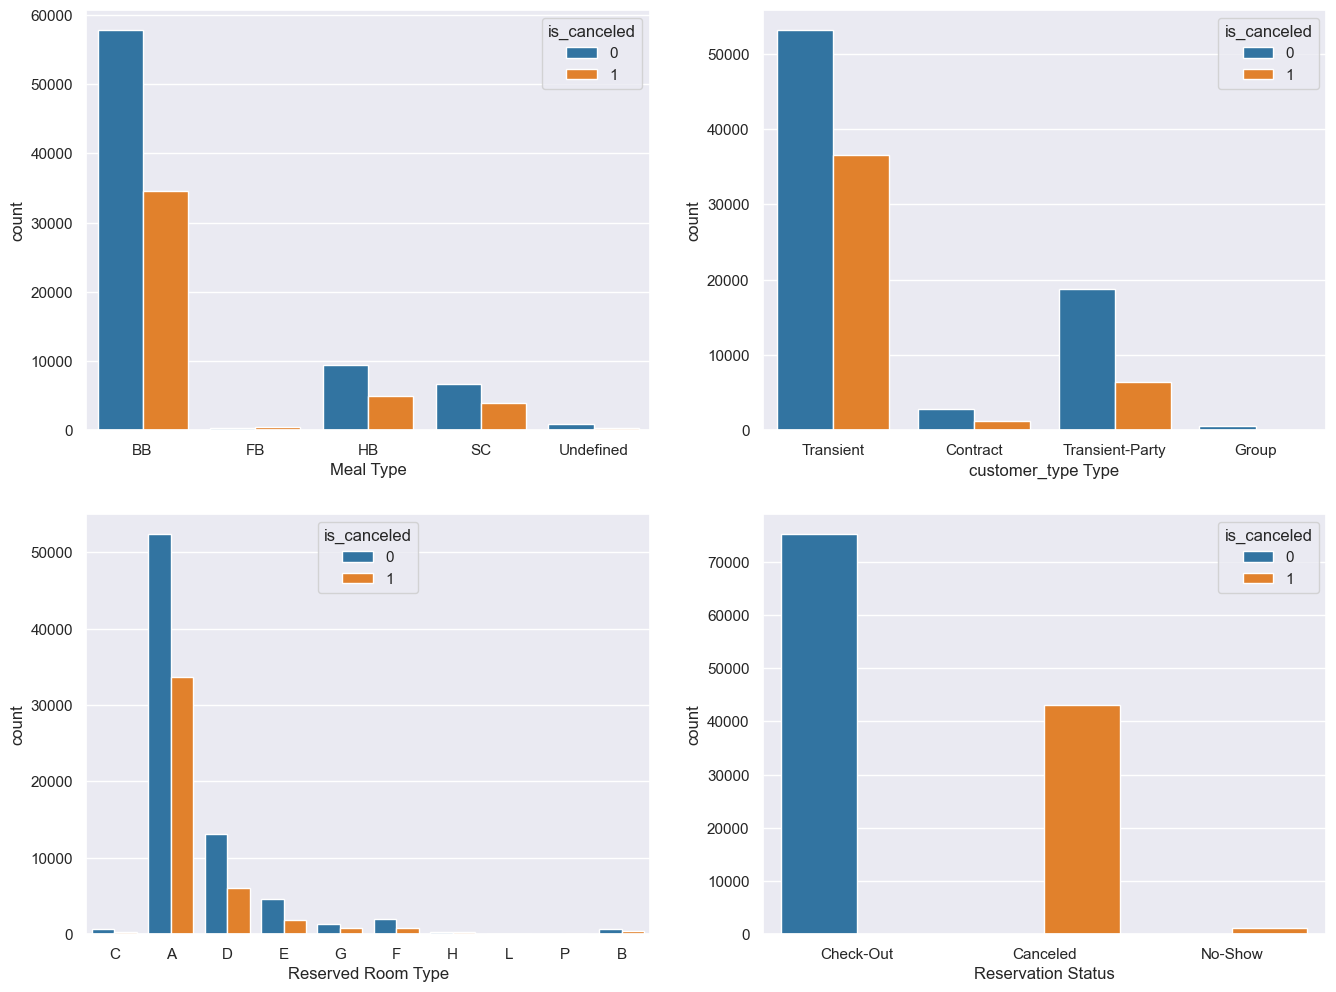

In [21]:
plt.figure(figsize=(16,12))
sns.set(palette = "tab10")
plt.subplot(221)
sns.countplot(x = booking_data['meal'], hue=booking_data['is_canceled'])
plt.xlabel('Meal Type')
plt.subplot(222)
sns.countplot(x = booking_data['customer_type'], hue=booking_data['is_canceled'])
plt.xlabel('customer_type Type')
plt.subplot(223)
sns.countplot(x = booking_data['reserved_room_type'], hue=booking_data['is_canceled'])
plt.xlabel('Reserved Room Type')
plt.subplot(224)
sns.countplot(x = booking_data['reservation_status'], hue=booking_data['is_canceled'])
plt.xlabel('Reservation Status')
plt.show()

In [23]:
#columns of dtype 'object'
booking_features = booking_data.select_dtypes(['object'])
booking_features

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-06
119386,City Hotel,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out,2017-09-07
119387,City Hotel,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,2017-09-07
119388,City Hotel,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-07


In [25]:
#bookings canceled (yes), sorted by longest to shortest lead time
booking_corr = booking_data[['hotel', 'is_canceled', 'lead_time', 'arrival_date_month', 'customer_type']]
canceled = booking_corr[booking_corr['is_canceled'] == 1]
canceled.sort_values(by=['lead_time'], ascending = False)

,hotel,is_canceled,lead_time,arrival_date_month,customer_type
65244,City Hotel,1,629,March,Transient
65240,City Hotel,1,629,March,Transient
65253,City Hotel,1,629,March,Transient
65252,City Hotel,1,629,March,Transient
65251,City Hotel,1,629,March,Transient
...,...,...,...,...,...
41950,City Hotel,1,0,August,Transient
42264,City Hotel,1,0,September,Transient
42336,City Hotel,1,0,September,Transient
57789,City Hotel,1,0,October,Transient


In [26]:
canceled['customer_type'].value_counts()

Transient          36514
Transient-Party     6389
Contract            1262
Group                 59
Name: customer_type, dtype: int64

In [27]:
canceled['hotel'].value_counts()

City Hotel      33102
Resort Hotel    11122
Name: hotel, dtype: int64

In [ ]:
#Correlation between customer type and hotel?

In [28]:
canceled['arrival_date_month'].value_counts()

August       5239
July         4742
May          4677
June         4535
April        4524
October      4246
September    4116
March        3149
February     2696
December     2371
November     2122
January      1807
Name: arrival_date_month, dtype: int64

In [29]:
#bookings NOT canceled (no), sorted by longest to shortest lead time
booking_corr = booking_data[[ 'hotel', 'is_canceled', 'lead_time', 'arrival_date_month', 'customer_type']]
not_canceled = booking_corr[booking_corr['is_canceled'] == 0]
not_canceled.sort_values(by=['lead_time'], ascending = False)

,hotel,is_canceled,lead_time,arrival_date_month,customer_type
1,Resort Hotel,0,737,July,Transient
4182,Resort Hotel,0,709,February,Transient
8422,Resort Hotel,0,542,September,Transient-Party
28416,Resort Hotel,0,542,September,Transient-Party
8419,Resort Hotel,0,542,September,Transient-Party
...,...,...,...,...,...
28845,Resort Hotel,0,0,October,Transient
78608,City Hotel,0,0,October,Transient
15087,Resort Hotel,0,0,November,Transient
15088,Resort Hotel,0,0,May,Transient


In [30]:
not_canceled['hotel'].value_counts()

City Hotel      46228
Resort Hotel    28938
Name: hotel, dtype: int64

is canceled vs. not canceled, group by season & customer_type

is canceled, group by hotel